# <span style="color:orange"> A Comprehensive Comparative Study on ML Model Performance (Model Comparion Framework)</span>

## <span style="color:orange"> ML Model Comparion Framework </span>

### <span style="color:cyne">  ML Problem Statement - The survey describes different driving scenarios including the destination, current time, weather, passenger etc and then ask the person whether he will accept the coupon if he is the driver.  </span>

#### Comparative Study to Find Best Model from below List Based on Performance Score 
#### (a) Logistic Regression Model
#### (b) Ramdom Forest Classifier
#### (c) Artificial Deep Neural Network (ANN)

# || Import Required Libraries ||

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from keras.constraints import maxnorm
import keras.optimizers
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# || Import "Coupon Reco" Data ||

In [2]:
drive.mount("/content/gdrive")
df = pd.read_excel('/content/gdrive/.../Coupon Reco.xlsx') 
df.head()

Mounted at /content/gdrive


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0


# || Data Cleaning and EDA ||

In [3]:
# number of rows and columns in df
df.shape

(12684, 25)

In [4]:
# Data Types Present
df.dtypes

destination             object
passenger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [5]:
# summary stats of the different fields
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
destination,12684,3,No Urgent Place,6283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passenger,12684,4,Alone,7305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather,12684,3,Sunny,10069,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,12684,NaN,NaN,NaN,63.3018,19.1545,30,55,80,80,80
time,12684,5,6PM,3230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coupon,12684,5,Coffee House,3996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expiration,12684,2,1d,7091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,12684,2,Female,6511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,12684,8,21,2653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maritalStatus,12684,5,Married partner,5100,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#value_counts for all the fields
for col in df.columns:
  print(df[col].value_counts())

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passenger, dtype: int64
Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64
80    6528
55    3840
30    2316
Name: temperature, dtype: int64
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64
1d    7091
2h    5593
Name: expiration, dtype: int64
Female    6511
Male      6173
Name: gender, dtype: int64
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               1

In [7]:
#which ones are the categorical variables
categorical_var = [var for var in df.columns if df[var].dtype == 'O']
categorical_var

['destination',
 'passenger',
 'weather',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'education',
 'occupation',
 'income',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50']

In [8]:
#check five records of the categorical variables
df[categorical_var].head()

,destination,passenger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,No Urgent Place,Alone,Sunny,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3
1,No Urgent Place,Friend(s),Sunny,10AM,Coffee House,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3
2,No Urgent Place,Friend(s),Sunny,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3
3,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3
4,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,1d,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3


In [9]:
# Finding missing values
df.isnull().sum()

destination               0
passenger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [10]:
# As the numbers of rows having missing values are less compared to total number of sample data points hence dropping rows having Null values 
df = df.dropna()

In [11]:
# Checking whether all data points containg Null values are removed 
df.isnull().sum()

destination             0
passenger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [12]:
# Recheck shape of df after removing missing values
df.shape

(12079, 25)

In [13]:
# uniques values present in Target/Label (Y)
df['Y'].unique()

array([1, 0])

In [14]:
# above confirms that this is a Binary Classification ML Problem
# Y = 1 (Accept Coupon)
# Y = 0 (Does Not Accept Coupon)

In [15]:
#distribution of Y
df['Y'].value_counts()

1    6877
0    5202
Name: Y, dtype: int64

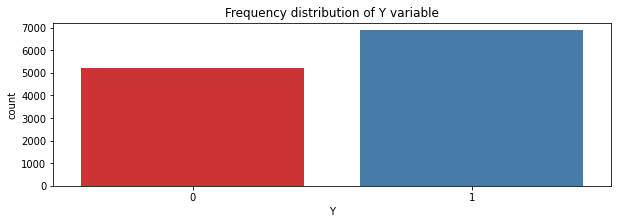

In [16]:
#Frequency distribution of income variable
plt.figure(figsize=(10, 3))
sns.countplot(x = "Y",data=df, palette="Set1")
plt.title("Frequency distribution of Y variable")
plt.show()

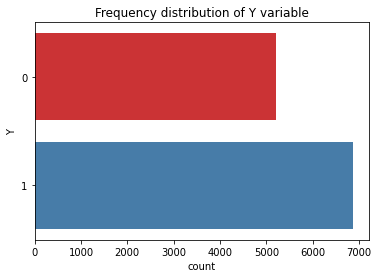

In [17]:
sns.countplot(y="Y", data=df, palette="Set1")
plt.title("Frequency distribution of Y variable")
plt.show()

In [18]:
# From the above visualization we can copnclude that this binary classification sample distribution is a balanced set

## || Apply One Hot Encoding to Convert Categorical Variables to Numerical Variables  ||

In [19]:
df1 = pd.get_dummies(df, columns=[
 'destination',
 'passenger',
 'weather',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'education',
 'occupation',
 'income',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50'],drop_first = True)

df1.head()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,destination_No Urgent Place,destination_Work,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Snowy,weather_Sunny,time_10PM,time_2PM,time_6PM,time_7AM,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_2h,gender_Male,age_26,age_31,age_36,age_41,age_46,age_50plus,age_below21,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,...,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,Bar_4~8,Bar_gt8,Bar_less1,Bar_never,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
22,55,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
23,80,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
24,80,0,1,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
25,80,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
26,80,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0


# || ML Modelling ||

## || Train Test Split ||

In [20]:
X = df1.drop(['Y'],axis=1).values
y = df1['Y'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [21]:
print('X.shape = ', X.shape)
print('y.shape = ', y.shape)
print()
print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print()
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ', y_test.shape)

X.shape =  (12079, 92)
y.shape =  (12079,)

X_train.shape =  (9663, 92)
y_train.shape =  (9663,)

X_test.shape =  (2416, 92)
y_test.shape =  (2416,)


## || Scaling || 

In [22]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## || Selection of Model Evaluation Metrices ||

In [23]:
# As this is a near balanced binary classification problem we will use below model evaluation metrices :
# 1. Accuracy
# 2. Precision
# 3. Recall
# 4. F1 Score

In [24]:
# Define Custom Confusion Matrix Display

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # Code to generate text
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # Summary Stats Generation
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        if len(cf)==2:
            # Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # Set Fig Param
    if figsize==None:
        # default Fig Size
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        categories=False


    # Create HeatMap
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual Label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

## || 1. Logistic Regression ||

In [25]:
lgr_model = LogisticRegression()
lgr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# LGR Model Scores --> 

lgr_y_pred = lgr_model.predict(X_test)

LGR_Accu_Score = accuracy_score(y_test, lgr_y_pred)
LGR_Prci_Score = precision_score(y_test, lgr_y_pred)
LGR_Recl_Score = recall_score(y_test, lgr_y_pred)
LGR_F1_Score   = f1_score(y_test, lgr_y_pred)

# Print LGR's Accuracy, Precision, Recall and F1 Scores --> 
print('LGR --> Accuracy, Precision, Recall and F1 Scores :')
print('')
print(f'Accuracy of LGR Model is    : {LGR_Accu_Score}')
print(f'Precision of LGR Model is   : {LGR_Prci_Score}')
print(f'Recall of LGR Model is      : {LGR_Recl_Score}')
print(f'F1-Score of LGR Model is    : {LGR_F1_Score}')
print('')

LGR --> Accuracy, Precision, Recall and F1 Scores :

Accuracy of LGR Model is    : 0.7003311258278145
Precision of LGR Model is   : 0.7142857142857143
Recall of LGR Model is      : 0.7947976878612717
F1-Score of LGR Model is    : 0.7523939808481533



In [27]:
print(classification_report(y_test,lgr_y_pred))

              precision    recall  f1-score   support

           0       0.68      0.57      0.62      1032
           1       0.71      0.79      0.75      1384

    accuracy                           0.70      2416
   macro avg       0.70      0.68      0.69      2416
weighted avg       0.70      0.70      0.70      2416



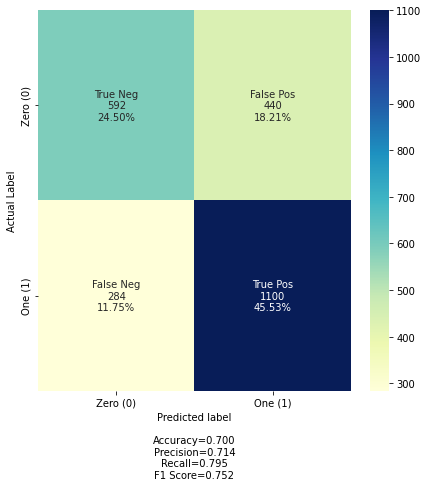

In [28]:
cm = confusion_matrix(y_test, lgr_y_pred)
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["Zero (0)", "One (1)"]
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      figsize = (7,7),
                      cmap="YlGnBu")

## || 2. Random Forest Classifier ||

In [29]:
# instantiate the RF Classifer
rfc_model = RandomForestClassifier(n_estimators = 100, random_state = 0,oob_score=True)

rfc_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [30]:
# RFC Model Scores --> 

rfc_y_pred = rfc_model.predict(X_test)

RFC_Accu_Score = accuracy_score(y_test, rfc_y_pred)
RFC_Prci_Score = precision_score(y_test, rfc_y_pred)
RFC_Recl_Score = recall_score(y_test, rfc_y_pred)
RFC_F1_Score   = f1_score(y_test, rfc_y_pred)

# Print RFC's Accuracy, Precision, Recall and F1 Scores --> 
print('RFC --> Accuracy, Precision, Recall and F1 Scores :')
print('')
print(f'Accuracy of RFC Model is    : {RFC_Accu_Score}')
print(f'Precision of RFC Model is   : {RFC_Prci_Score}')
print(f'Recall of RFC Model is      : {RFC_Recl_Score}')
print(f'F1-Score of RFC Model is    : {RFC_F1_Score}')
print('')

RFC --> Accuracy, Precision, Recall and F1 Scores :

Accuracy of RFC Model is    : 0.7798013245033113
Precision of RFC Model is   : 0.7806324110671937
Recall of RFC Model is      : 0.8562138728323699
F1-Score of RFC Model is    : 0.8166781529979324



In [31]:
print(classification_report(y_test, rfc_y_pred))

              precision    recall  f1-score   support

           0       0.78      0.68      0.72      1032
           1       0.78      0.86      0.82      1384

    accuracy                           0.78      2416
   macro avg       0.78      0.77      0.77      2416
weighted avg       0.78      0.78      0.78      2416



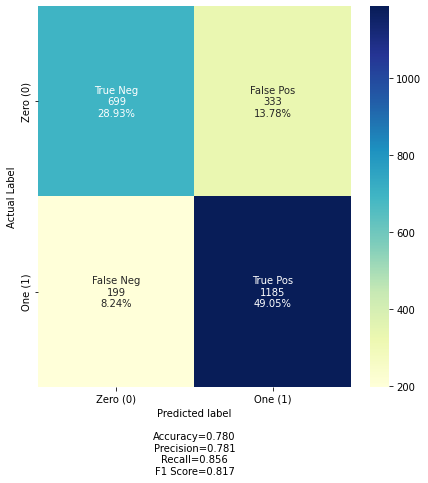

In [32]:
cm = confusion_matrix(y_test, rfc_y_pred)
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["Zero (0)", "One (1)"]
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      figsize = (7,7),
                      cmap="YlGnBu")

## || 3. ANN || 

In [33]:
X_train.shape

(9663, 92)

In [34]:
# initializing ann
model = Sequential()

# adding the input layer, 2 hidden layers and output layer
model.add(Dense(92, activation = 'relu', input_shape = (92, )))
model.add(Dropout(0.3))
model.add(Dense(92, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(92, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))

# compiling the model
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
model_history = model.fit(x=X_train, 
          y=y_train, 
          batch_size=32,
          validation_split = 0.20,
          epochs=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200
242/242 [==============================] - 2s 3ms/step - loss: 0.6873 - accuracy: 0.5583 - val_loss: 0.6822 - val_accuracy: 0.5654
Epoch 2/200
242/242 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5630 - val_loss: 0.6755 - val_accuracy: 0.5654
Epoch 3/200
242/242 [==============================] - 1s 2ms/step - loss: 0.6769 - accuracy: 0.5775 - val_loss: 0.6704 - val_accuracy: 0.5825
Epoch 4/200
242/242 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.5788 - val_loss: 0.6644 - val_accuracy: 0.5929
Epoch 5/200
242/242 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.5849 - val_loss: 0.6582 - val_accuracy: 0.6105
Epoch 6/200
242/242 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.5916 - val_loss: 0.6529 - val_accuracy: 0.6389
Epoch 7/200
242/242 [==============================] - 1s 2ms/step - loss: 0.6632 - accuracy: 0.5977 - val_loss: 0.6457 - val_accuracy: 0.6353

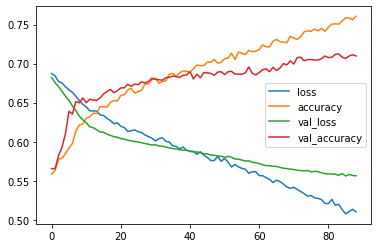

In [35]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [36]:
# ANN Model Scores --> 

ann_y_pred = model.predict(X_test)
ann_y_pred[ann_y_pred > 0.50] = 1
ann_y_pred[ann_y_pred <= 0.50] = 0

ANN_Accu_Score = accuracy_score(y_test, ann_y_pred)
ANN_Prci_Score = precision_score(y_test, ann_y_pred, labels=np.unique(ann_y_pred))
ANN_Recl_Score = recall_score(y_test, ann_y_pred, labels=np.unique(ann_y_pred))
ANN_F1_Score = f1_score(y_test, ann_y_pred, labels=np.unique(ann_y_pred))

# Print ANN's Accuracy, Precision, Recall and F1 Scores --> 
print('ANN --> Accuracy, Precision, Recall and F1 Scores :')
print('')
print(f'Accuracy of ANN Model is    : {ANN_Accu_Score}')
print(f'Precision of ANN Model is   : {ANN_Prci_Score}')
print(f'Recall of ANN Model is      : {ANN_Recl_Score}')
print(f'F1-Score of ANN Model is    : {ANN_F1_Score}')
print('')

ANN --> Accuracy, Precision, Recall and F1 Scores :

Accuracy of ANN Model is    : 0.7388245033112583
Precision of ANN Model is   : 0.7440051847051199
Recall of ANN Model is      : 0.8294797687861272
F1-Score of ANN Model is    : 0.7844209087803212



In [37]:
print(classification_report(y_test,ann_y_pred))

              precision    recall  f1-score   support

           0       0.73      0.62      0.67      1032
           1       0.74      0.83      0.78      1384

    accuracy                           0.74      2416
   macro avg       0.74      0.72      0.73      2416
weighted avg       0.74      0.74      0.74      2416



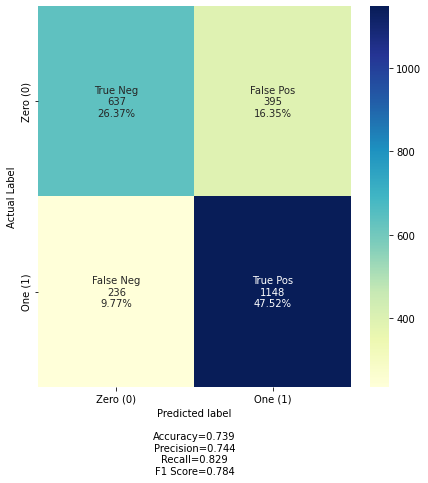

In [38]:
cm = confusion_matrix(y_test,ann_y_pred)
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["Zero (0)", "One (1)"]
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      figsize = (7,7),
                      cmap="YlGnBu")

## Model Performance and Score Comparison Among Logistic / Random Forest / ANN

In [39]:
    models_scores_table = pd.DataFrame({'Logistic Regression':[LGR_Accu_Score,
                                                               LGR_Prci_Score,
                                                               LGR_Recl_Score,
                                                               LGR_F1_Score],                                  
                                       
                                      'Random Forest':[RFC_Accu_Score,
                                                       RFC_Prci_Score,
                                                       RFC_Recl_Score,
                                                       RFC_F1_Score],
                                       
                                      'ANN'          :[ANN_Accu_Score,
                                                       ANN_Prci_Score,
                                                       ANN_Recl_Score,
                                                       ANN_F1_Score]},
                                       
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Calculate 'Best Score'
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Print Models Performance Metrics Scores
    models_scores_table

,Logistic Regression,Random Forest,ANN,Best Score
Accuracy,0.700331,0.779801,0.738825,Random Forest
Precision,0.714286,0.780632,0.744005,Random Forest
Recall,0.794798,0.856214,0.829480,Random Forest
F1 Score,0.752394,0.816678,0.784421,Random Forest


# || Hyperparameter Tuning - Model Optimization ||

## || 1. Logistic Regression - Grid Search Hyperparameter Tuning ||

In [40]:
# define model
cv_lgr_model = LogisticRegression()
# define evaluation
cv_lgr = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-1, 1, 10, 100]
# define search
search_lgr = GridSearchCV(cv_lgr_model, space, scoring='accuracy', n_jobs=-1, cv=cv_lgr)
# execute search
result_lgr = search_lgr.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
# summarize result
print('Best Score: %s' % result_lgr.best_score_)
print('Best Hyperparameters: %s' % result_lgr.best_params_)

Best Score: 0.6886604035327403
Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


## || 1. LGR Prediction with Hyperparameter Tuned Model ||

In [42]:
hyp_lgr_model = LogisticRegression(max_iter=10000, C = 100, penalty = 'l2', solver = 'lbfgs')

hyp_lgr_model.fit(X_train,y_train)

# LGR Model Scores (Hyperparameter Tuned) --> 

hyp_lgr_y_pred = hyp_lgr_model.predict(X_test)

hyp_LGR_Accu_Score = accuracy_score(y_test, hyp_lgr_y_pred)
hyp_LGR_Prci_Score = precision_score(y_test, hyp_lgr_y_pred)
hyp_LGR_Recl_Score = recall_score(y_test, hyp_lgr_y_pred)
hyp_LGR_F1_Score   = f1_score(y_test, hyp_lgr_y_pred)

# Print Hyperparameter Tuned LGR's Accuracy, Precision, Recall and F1 Scores --> 
print('Hyperparameter Tuned LGR --> Accuracy, Precision, Recall and F1 Scores :')
print('')
print(f'Accuracy of LGR Model is    : {hyp_LGR_Accu_Score}')
print(f'Precision of LGR Model is   : {hyp_LGR_Prci_Score}')
print(f'Recall of LGR Model is      : {hyp_LGR_Recl_Score}')
print(f'F1-Score of LGR Model is    : {hyp_LGR_F1_Score}')
print('')

Hyperparameter Tuned LGR --> Accuracy, Precision, Recall and F1 Scores :

Accuracy of LGR Model is    : 0.7011589403973509
Precision of LGR Model is   : 0.714935064935065
Recall of LGR Model is      : 0.7955202312138728
F1-Score of LGR Model is    : 0.7530779753761971



In [43]:
print(classification_report(y_test, hyp_lgr_y_pred))

              precision    recall  f1-score   support

           0       0.68      0.57      0.62      1032
           1       0.71      0.80      0.75      1384

    accuracy                           0.70      2416
   macro avg       0.70      0.69      0.69      2416
weighted avg       0.70      0.70      0.70      2416



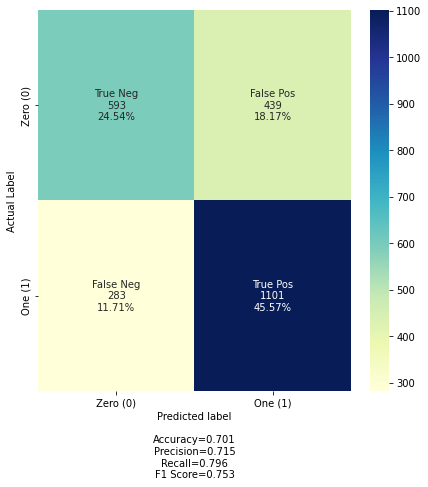

In [44]:
cm = confusion_matrix(y_test, hyp_lgr_y_pred)
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["Zero (0)", "One (1)"]
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      figsize = (7,7),
                      cmap="YlGnBu")

## || 2. Random Forest Classifier - Grid Search Hyperparameter Tuning ||

In [45]:
# define model
cv_rfc_model = RandomForestClassifier()

# define evaluation
cv_rfc = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()

space['n_estimators']       = [50, 100, 200]
space['max_depth']          = [5, 8]
space['min_samples_split']  = [2, 5]
space['min_samples_leaf']  = [1, 2] 

# define search
search_rfc = GridSearchCV(cv_rfc_model, space, scoring='accuracy', n_jobs=-1, cv=cv_rfc)
# execute search
result_rfc = search_rfc.fit(X, y)

In [46]:
# summarize result
print('Best Score: %s' % result_rfc.best_score_)
print('Best Hyperparameters: %s' % result_rfc.best_params_)

Best Score: 0.7053564472146476
Best Hyperparameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## || 2. RFC Prediction with Hyperparameter Tuned Model ||

In [47]:
#define hyperparameter tuned RFC Model
hyp_rfc_model = RandomForestClassifier(max_depth = 8, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100, oob_score=True)

hyp_rfc_model.fit(X_train,y_train)

# RFC Model Scores (Hyperparameter Tuned) --> 

hyp_rfc_y_pred = hyp_rfc_model.predict(X_test)

hyp_RFC_Accu_Score = accuracy_score(y_test, hyp_rfc_y_pred)
hyp_RFC_Prci_Score = precision_score(y_test, hyp_rfc_y_pred)
hyp_RFC_Recl_Score = recall_score(y_test, hyp_rfc_y_pred)
hyp_RFC_F1_Score   = f1_score(y_test, hyp_rfc_y_pred)

# Print Hyperparameter Tuned RFC's Accuracy, Precision, Recall and F1 Scores --> 
print('Hyperparameter Tuned RFC --> Accuracy, Precision, Recall and F1 Scores :')
print('')
print(f'Accuracy of RFC Model is    : {hyp_RFC_Accu_Score}')
print(f'Precision of RFC Model is   : {hyp_RFC_Prci_Score}')
print(f'Recall of RFC Model is      : {hyp_RFC_Recl_Score}')
print(f'F1-Score of RFC Model is    : {hyp_RFC_F1_Score}')
print('')

Hyperparameter Tuned RFC --> Accuracy, Precision, Recall and F1 Scores :

Accuracy of RFC Model is    : 0.7077814569536424
Precision of RFC Model is   : 0.6939359267734554
Recall of RFC Model is      : 0.8764450867052023
F1-Score of RFC Model is    : 0.7745849297573436



In [48]:
print(classification_report(y_test, hyp_rfc_y_pred))

              precision    recall  f1-score   support

           0       0.74      0.48      0.58      1032
           1       0.69      0.88      0.77      1384

    accuracy                           0.71      2416
   macro avg       0.72      0.68      0.68      2416
weighted avg       0.72      0.71      0.69      2416



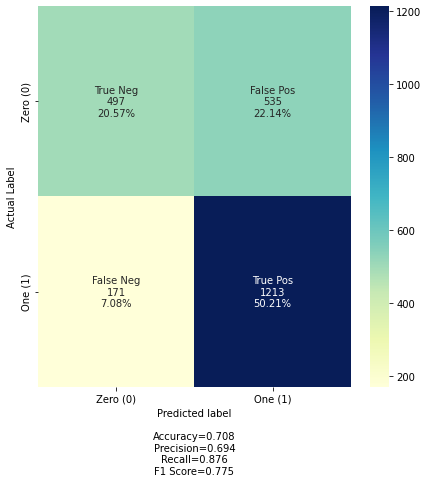

In [49]:
cm = confusion_matrix(y_test, hyp_rfc_y_pred)
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["Zero (0)", "One (1)"]
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      figsize = (7,7),
                      cmap="YlGnBu")

## || 3. ANN - Grid Search Hyperparameter Tuning ||

In [50]:
# define ANN model function
def create_model(dropout_rate=0.0, weight_constraint=0,learn_rate=0.01):
  # create model
  model = Sequential()
  model.add(Dense(92, input_dim=92, kernel_initializer='uniform', activation='relu', kernel_constraint=maxnorm(weight_constraint)))
  model.add(Dropout(dropout_rate))
  model.add(Dense(92, activation = 'relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(92, activation = 'relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

  # Compile model
  optimizer = tensorflow.keras.optimizers.SGD(lr=learn_rate)
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

seed = 7

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=128, verbose=0)

# define the grid search parameters
weight_constraint = [2, 3, 4]
dropout_rate      = [0.1, 0.2, 0.3, 0.4]
learn_rate        = [0.001, 0.01, 0.1]

param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint, learn_rate=learn_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Best: 0.622895 using {'dropout_rate': 0.1, 'learn_rate': 0.01, 'weight_constraint': 3}


## || 3. ANN Prediction with Hyperparameter Tuned Model ||

In [51]:
# initializing ann
hyp_ann_model = Sequential()

# adding the input layer, 3 hidden layers, 3 dropout layers and output layer
hyp_ann_model.add(Dense(92, activation = 'relu', input_shape = (92, ), kernel_initializer='uniform', kernel_constraint=maxnorm(3)))
hyp_ann_model.add(Dropout(0.1))
hyp_ann_model.add(Dense(92, activation = 'relu'))
hyp_ann_model.add(Dropout(0.1))
hyp_ann_model.add(Dense(92, activation = 'relu'))
hyp_ann_model.add(Dropout(0.1))
hyp_ann_model.add(Dense(1, activation = 'sigmoid'))

# compiling the model
optimizer = tensorflow.keras.optimizers.SGD(learning_rate=0.01)
hyp_ann_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# fitting the model to the training set 
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
model_history = hyp_ann_model.fit(x=X_train, 
          y=y_train, 
          batch_size=128,
          validation_split = 0.20,
          epochs=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200
61/61 [==============================] - 1s 5ms/step - loss: 0.6892 - accuracy: 0.5523 - val_loss: 0.6865 - val_accuracy: 0.5613
Epoch 2/200
61/61 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.5661 - val_loss: 0.6838 - val_accuracy: 0.5613
Epoch 3/200
61/61 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.5693 - val_loss: 0.6821 - val_accuracy: 0.5613
Epoch 4/200
61/61 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5713 - val_loss: 0.6808 - val_accuracy: 0.5613
Epoch 5/200
61/61 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.5705 - val_loss: 0.6796 - val_accuracy: 0.5613
Epoch 6/200
61/61 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.5696 - val_loss: 0.6784 - val_accuracy: 0.5613
Epoch 7/200
61/61 [==============================] - 0s 3ms/step - loss: 0.6770 - accuracy: 0.5713 - val_loss: 0.6771 - val_accuracy: 0.5613
Epoch 8/200
6

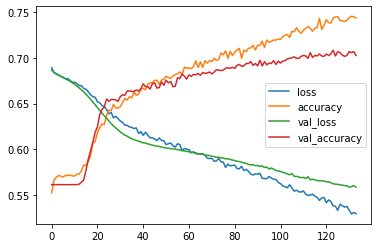

In [52]:
model_loss = pd.DataFrame(hyp_ann_model.history.history)
model_loss.plot()

In [53]:
# Hyperparameter Tuned ANN Model Scores --> 

hyp_ann_y_pred = hyp_ann_model.predict(X_test)
hyp_ann_y_pred[hyp_ann_y_pred > 0.50] = 1
hyp_ann_y_pred[hyp_ann_y_pred <= 0.50] = 0

hyp_ANN_Accu_Score = accuracy_score(y_test, hyp_ann_y_pred)
hyp_ANN_Prci_Score = precision_score(y_test, hyp_ann_y_pred, labels=np.unique(ann_y_pred))
hyp_ANN_Recl_Score = recall_score(y_test, hyp_ann_y_pred, labels=np.unique(ann_y_pred))
hyp_ANN_F1_Score = f1_score(y_test, hyp_ann_y_pred, labels=np.unique(ann_y_pred))

# Print Hyperparameter Tunned ANN's Accuracy, Precision, Recall and F1 Scores --> 
print('Hyperparameter Tunned ANN --> Accuracy, Precision, Recall and F1 Scores :')
print('')
print(f'Accuracy of ANN Model is    : {hyp_ANN_Accu_Score}')
print(f'Precision of ANN Model is   : {hyp_ANN_Prci_Score}')
print(f'Recall of ANN Model is      : {hyp_ANN_Recl_Score}')
print(f'F1-Score of ANN Model is    : {hyp_ANN_F1_Score}')
print('')

Hyperparameter Tunned ANN --> Accuracy, Precision, Recall and F1 Scores :

Accuracy of ANN Model is    : 0.7301324503311258
Precision of ANN Model is   : 0.741106719367589
Recall of ANN Model is      : 0.8128612716763006
F1-Score of ANN Model is    : 0.7753273604410751



In [54]:
print(classification_report(y_test,hyp_ann_y_pred))

              precision    recall  f1-score   support

           0       0.71      0.62      0.66      1032
           1       0.74      0.81      0.78      1384

    accuracy                           0.73      2416
   macro avg       0.73      0.72      0.72      2416
weighted avg       0.73      0.73      0.73      2416



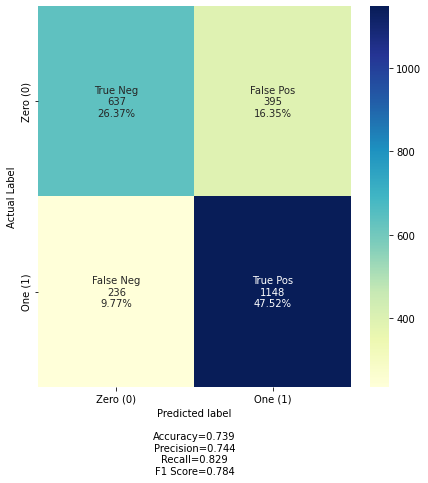

In [55]:
cm = confusion_matrix(y_test,ann_y_pred)
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["Zero (0)", "One (1)"]
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      figsize = (7,7),
                      cmap="YlGnBu")

## || Hyperparameter Tuned Model Performance and Score Comparison Among Logistic, Random Forest and ANN ||

In [56]:
    hyp_models_scores_table = pd.DataFrame({'Logistic Regression':[hyp_LGR_Accu_Score,
                                                               hyp_LGR_Prci_Score,
                                                               hyp_LGR_Recl_Score,
                                                               hyp_LGR_F1_Score],                                  
                                       
                                      'Random Forest':[hyp_RFC_Accu_Score,
                                                       hyp_RFC_Prci_Score,
                                                       hyp_RFC_Recl_Score,
                                                       hyp_RFC_F1_Score],
                                       
                                      'ANN'          :[hyp_ANN_Accu_Score,
                                                       hyp_ANN_Prci_Score,
                                                       hyp_ANN_Recl_Score,
                                                       hyp_ANN_F1_Score]},
                                       
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Calculate 'Best Score'
    hyp_models_scores_table['Best Score'] = hyp_models_scores_table.idxmax(axis=1)
    
    # Print Models Performance Metrics Scores
    hyp_models_scores_table

,Logistic Regression,Random Forest,ANN,Best Score
Accuracy,0.701159,0.707781,0.730132,ANN
Precision,0.714935,0.693936,0.741107,ANN
Recall,0.795520,0.876445,0.812861,Random Forest
F1 Score,0.753078,0.774585,0.775327,ANN


# || Final Hyperparameter Optimized Modelling with K-Fold Cross Validation ||

## || ANN ----->  K-Fold Cross Validation ||

In [57]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
cvscores = []
cvscores_prci = []
cvscores_recl = []
cvscores_f1   = []
for train, test in kfold.split(X, y):
  kf_model = Sequential()
  kf_model.add(Dense(92, activation = 'relu', input_shape = (92, ), kernel_initializer='uniform', kernel_constraint=maxnorm(3)))
  kf_model.add(Dropout(0.1))
  kf_model.add(Dense(92, activation = 'relu'))
  kf_model.add(Dropout(0.1))
  kf_model.add(Dense(92, activation = 'relu'))
  kf_model.add(Dropout(0.1))
  kf_model.add(Dense(1, activation = 'sigmoid'))

  # Compile Model
  optimizer = tensorflow.keras.optimizers.SGD(learning_rate=0.01)
  kf_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  # Fit the Model
  kf_model.fit(X[train], y[train], epochs=100, batch_size=32, verbose=0)

  # Evaluate the Model
  scores = kf_model.evaluate(X[test], y[test], verbose=0)

  kf_ann_y_pred = kf_model.predict(X[test])
  kf_ann_y_pred[kf_ann_y_pred > 0.50] = 1
  kf_ann_y_pred[kf_ann_y_pred <= 0.50] = 0

  KF_ANN_Accu_Score = accuracy_score(y[test], kf_ann_y_pred)
  KF_ANN_Prci_Score = precision_score(y[test], kf_ann_y_pred, labels=np.unique(kf_ann_y_pred))
  KF_ANN_Recl_Score = recall_score(y[test], kf_ann_y_pred, labels=np.unique(kf_ann_y_pred))
  KF_ANN_F1_Score   = f1_score(y[test], kf_ann_y_pred, labels=np.unique(kf_ann_y_pred))

  cvscores.append(KF_ANN_Accu_Score)
  cvscores_prci.append(KF_ANN_Prci_Score)
  cvscores_recl.append(KF_ANN_Recl_Score)
  cvscores_f1.append(KF_ANN_F1_Score)

print("%s: %.2f%%" % (kf_model.metrics_names[1], scores[1]*100))

accuracy: 56.94%


## || Logistic Regression & Random Forest Classifier ---->  K-Fold Cross Validation ||

In [58]:
# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

#define hyperparameter tuned LGR and RFC models
opt_lgr_model = LogisticRegression(max_iter=10000, C = 100, penalty = 'l2', solver = 'lbfgs')
opt_rfc_model = RandomForestClassifier(max_depth = 8, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100, oob_score=True)

# Define the models evaluation function
def models_evaluation(X, y, folds):
    
    # Perform cross-validation to each machine learning classifier
    opt_lgr = cross_validate(opt_lgr_model, X, y, cv=folds, scoring=scoring)
    opt_rfc = cross_validate(opt_rfc_model, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models perfoamnce metrics scores
    opt_models_scores_table = pd.DataFrame({'Logistic Regression':[opt_lgr['test_accuracy'].mean(),
                                                                   opt_lgr['test_precision'].mean(),
                                                                   opt_lgr['test_recall'].mean(),
                                                                   opt_lgr['test_f1_score'].mean()],                                  
                                       
                                           'Random Forest'      :[opt_rfc['test_accuracy'].mean(),
                                                                  opt_rfc['test_precision'].mean(),
                                                                  opt_rfc['test_recall'].mean(),
                                                                  opt_rfc['test_f1_score'].mean()],
                                       
                                           'ANN'                :[np.mean(cvscores),
                                                                  np.mean(cvscores_prci),
                                                                  np.mean(cvscores_recl),
                                                                  np.mean(cvscores_f1)]},
                                       
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    opt_models_scores_table['Best Score'] = opt_models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(opt_models_scores_table)
  
# Run models_evaluation function
models_evaluation(X, y, 5)

,Logistic Regression,Random Forest,ANN,Best Score
Accuracy,0.664791,0.671993,0.569335,Random Forest
Precision,0.686805,0.667726,0.569335,Logistic Regression
Recall,0.758458,0.845561,1.000000,ANN
F1 Score,0.720037,0.745649,0.725575,Random Forest


# || Final Report on the Above ML Experiment ||

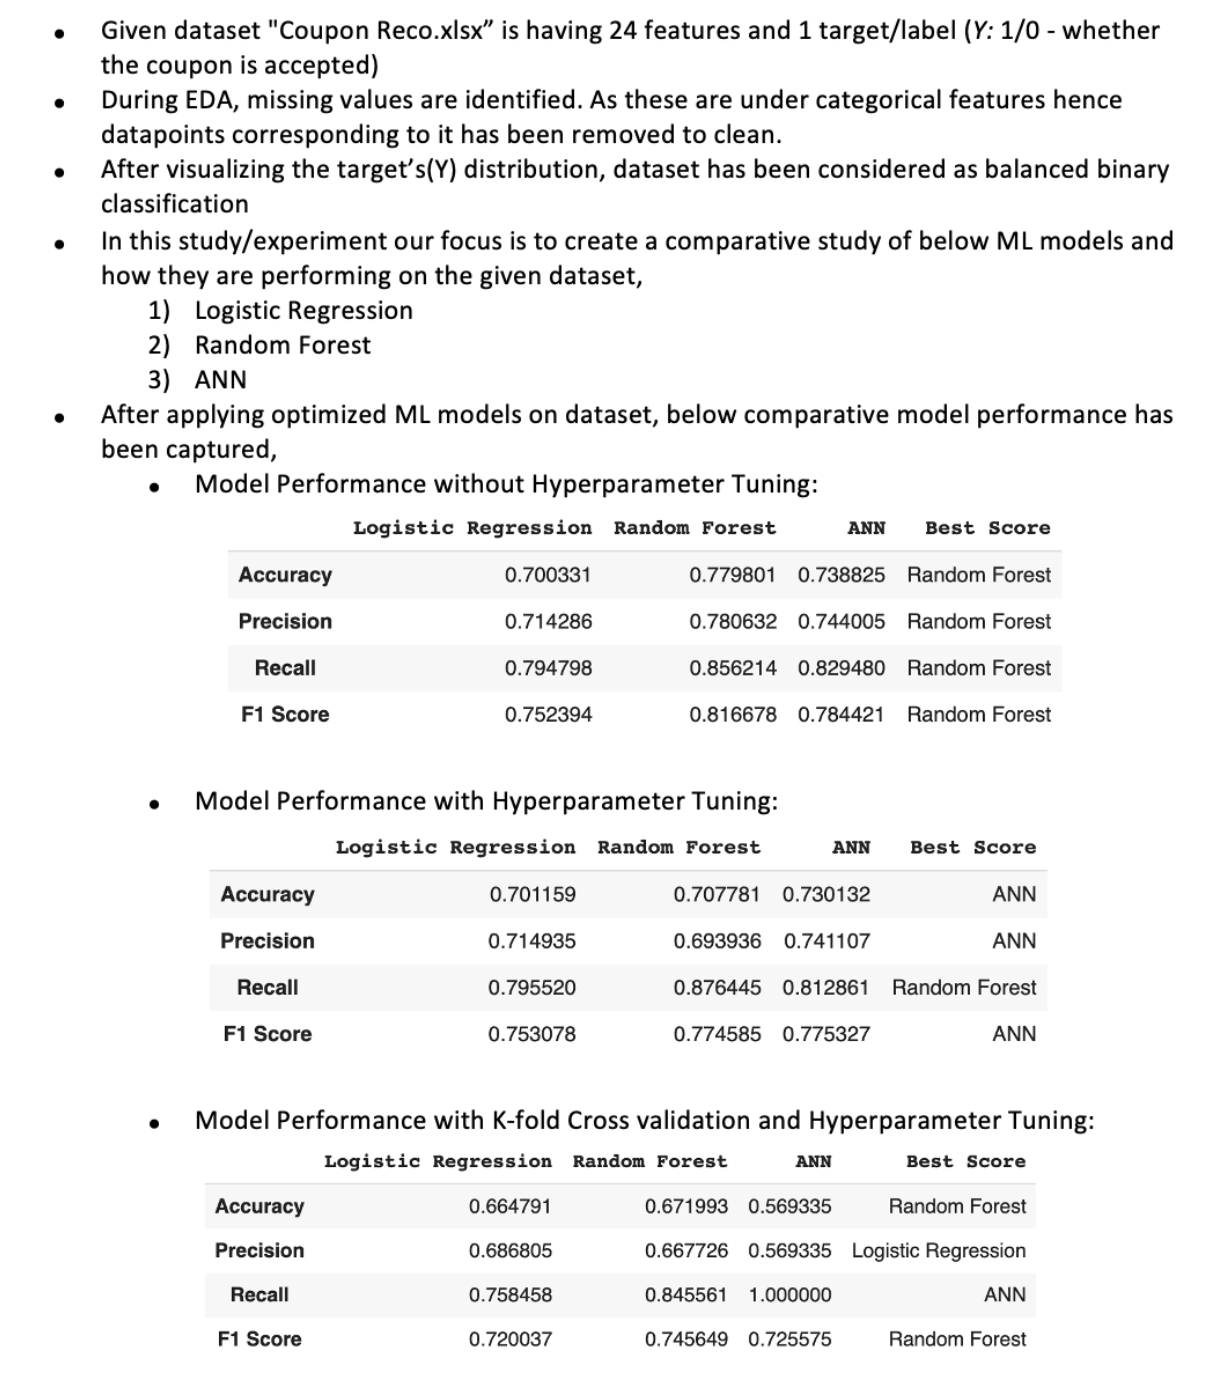